In [1]:
%matplotlib inline
import chemical_evolution as chemevo
import nine_species_network as net9
import numpy as np
import matplotlib.pyplot as plt

## Usage

First, we need to load species data. We set the fraction of each species to 1.

In [2]:
species_info = net9.LoadingHook.load_species()
all_species = [
    chemevo.Species(name, 1, symbol=symbol)
    for name, symbol in species_info
]
HI, HII, HM, HeI, HeII, HeIII, H2I, H2II, de, gma, grn = [species.symbol for species in all_species]

Similarly, we load the reaction data.

In [3]:
reaction_info = net9.LoadingHook.load_reactions()
all_reactions = [
    chemevo.Reaction(eval(lhs), eval(rhs), rate=net9.HardCoded.calc_rate(1e5, i), rate_symbol=rate_symbol)
    for i, ((lhs, rhs), rate_symbol) in enumerate(reaction_info)
]

Then, we construct the system using the species and the reactions loaded above.

In [4]:
system = chemevo.ChemEvo(all_species, all_reactions)

We update the system, recording the evolution history of the species in a list and plot it later.

In [5]:
y_hist = [system.y]

In [6]:
for i in range(100000):
    if i % 10000 == 0:
        print(i)
    system.update(1e3)
    y_hist.append(system.y)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000


Text(0,0.5,'Amount')

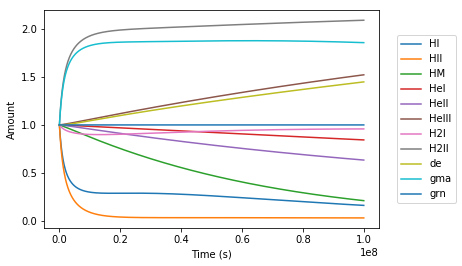

In [7]:
t = np.linspace(0, 100000000, 100001)
for i in range(11):
    plt.plot(t, [x[i] for x in y_hist], label=system.all_species[i].name)
plt.legend([species.name for species in system.all_species],
            bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.xlabel('Time (s)')
plt.ylabel('Amount')

### Command line application

```
usage: 9_species_net.py [-h]
                        h_frac he_frac h2_frac density temperature end_time
                        integrator

9-species network simulator.
Example: python 9_species_net.py 1 1 1 1 100000 1000000 vode

positional arguments:
  h_frac       initial H ionization fraction
  he_frac      initial He ionization fraction
  h2_frac      initial molecular hydrogen fraction
  density      density
  temperature  temperature
  end_time     time to evolve to
  integrator   integrator to use inside scipy.integrate.ode

optional arguments:
  -h, --help   show this help message and exit
```

## Discussion questions

### When is it slower and faster? When it is near equilibrium or far?
The evolution is faster at the start and slower near the end. The system starts from the specified composition and achieves equilibrium gradually.



### Do you see any particularly interesting regions in phase space?
At round $t=1\times10^7$, as the amount of $H+$ drastically drops and the amount of $H_2^+$ increases, the fraction of $H_2$ stops dropping and starts increasing.

### What was easy or hard?

The hard-coded equations are hard to handle, but the project is not too bad overall.